<img src="header_linreg.png">

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Hintergrund

Sie haben die lineare Regression bereits als Tool in der Statistik kennengelernt. Im einfachsten Beispiel approximiert sie gegebene Punktpaare $\left\{(x_i, y_i)\right\}_{i=1,\dots,n}$ (blau) mit einer Gerade $\hat{y} = f(x) = \hat{m} x + \hat{q}$ (rot):

<img src="linreg.png" width="700">

Im Skript 'Lineare Algebra für Data Scientists' haben Sie gesehen, dass dieses Problem kompakt formuliert werden kann als

$$\hat{\mathbf{y}} = X \hat{\boldsymbol{\beta}},$$

mit

\begin{equation}
X = \begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{pmatrix}, \quad \mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, \quad \hat{\mathbf{y}} = \begin{pmatrix} \hat{y}_1 \\ \hat{y}_2 \\ \vdots \\ \hat{y}_n \end{pmatrix} \quad \text{und} \quad \boldsymbol{\hat{\beta}} = \begin{pmatrix} \hat{q} \\ \hat{m} \end{pmatrix},
\end{equation}

Dort hat sich auch gezeigt, dass ein optimaler Parameter $\hat{\boldsymbol{\beta}}$ gefunden werden kann, indem die mittlere quadratische Abweichung $\frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2 = \frac{1}{n} \left(\hat{\mathbf{y}} - \mathbf{y}\right)^T \left(\hat{\mathbf{y}} - \mathbf{y}\right)$ minimiert wird. Der optimale Vektor für $\hat{\boldsymbol{\beta}}$ lautet

$$\hat{\boldsymbol{\beta}} = \left(X^T X\right)^{-1} X^T \, \mathbf{y}.$$


Damit sind Sie nun in der Lage, einfache Regressionsprobleme zu lösen.

## Ihre Aufgabe

###  a)

Gegeben sei die folgende Liste aus Wertepaaren $(x_i, y_i)$:

In [2]:
w = np.array( 
    [(0.0, 3.8), (1.0, 3.9), (2.0, 5.4), (3.0, 6.5), (4.0, 6.1), (5.0, 10.5), (6.0, 10.3), (7.0, 12.6), 
     (8.0, 12.1), (9.0, 14.4), (10.0, 14.7)] 
)

Graphisch dargestellt:

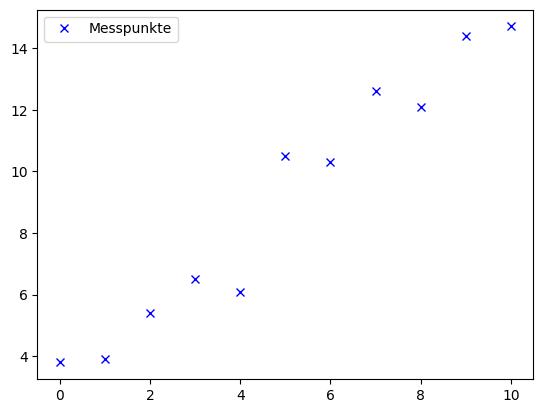

In [3]:
x = w[:,0]
y = w[:,1]
plt.plot( x, y, 'x', color="blue", label="Messpunkte" )
plt.legend()
plt.show()

Bestimmen Sie die Design-Matrix $\mathbf{X}$ und den Spaltenvektor $\mathbf{y}$ und geben Sie beide aus.

**Hinweise:** 

* Mit `np.ones(..)` können Sie Matrizen oder Vektoren aus Einsen erstellen.
* Mit `.reshape(-1,1)` können Sie aus einem Zeilenvektor einen Spaltenvektor machen.
* Mit `np.hstack(..)`/`np.vstack(..)` können Sie Vektoren horizontal/vertikal zu einer Matrix aneinanderreihen.
* Mit `help(..)` erhalten Sie Soforthilfe zu einem Python-Befehl.

### Lösung

In [4]:
X = np.hstack([np.ones([len(x),1]), x.reshape(-1,1)])
X

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [5]:
y = y.reshape(-1,1)
y

array([[ 3.8],
       [ 3.9],
       [ 5.4],
       [ 6.5],
       [ 6.1],
       [10.5],
       [10.3],
       [12.6],
       [12.1],
       [14.4],
       [14.7]])

In [6]:
assert( X.shape==(y.shape[0],2) )

### b)

Bestimmen Sie mit der in Teil a) berechneten Design-Matrix $\mathbf{X}$ und dem Spaltenvektor $\mathbf{y}$ nun die optimalen Werte für $m$ und $q$. Geben Sie die Lösung aus und stellen Sie die resultierende Regressionsgerade (=beste angenäherte Gerade) graphisch dar.

### Lösung

In [7]:
beta = np.linalg.inv( np.dot( X.T, X ) ).dot( X.T.dot(y) )
q = beta[0,0]
m = beta[1,0]
print("Lösung: m = {}, q = {}".format(q,m))

Lösung: m = 3.0727272727272767, q = 1.2090909090909079


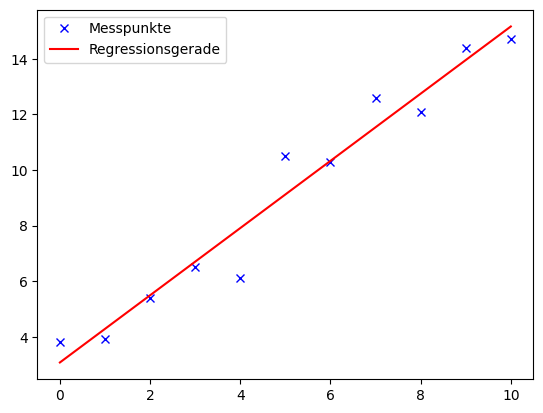

In [8]:
yhat = m * x + q
plt.plot( x, y, 'x', color="blue", label="Messpunkte" )
plt.plot( x, yhat, color="red", label="Regressionsgerade" )
plt.legend()
plt.show()

### c)

Berechnen Sie den mittleren quadratischen Fehler 

$$\text{MSE} = \frac1n \sum_{i=1}^n \left( f(x_i) - y_i \right)^2$$ 

für die Regressionsgerade aus Teilaufgabe b) und geben Sie ihn aus.

### Lösung

In [9]:
mse = np.mean( (yhat - y )**2 )
print("Quadratischer Fehler: {}".format(mse))

Quadratischer Fehler: 29.95322314049584


## Mögliche Interessante Zusatzaufgaben

### Zusatz 1: Multivariate lineare Regression

Überlegen Sie sich, wie Sie das oben beschriebene Regressionsproblem erweitern können, um statt skalaren Werten $x_i$ Vektoren $\mathbf{x}_i$ berücksichtigen zu können.